# Import Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Data Read

In [2]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Null  and Duplicate check

In [5]:
df.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.duplicated().sum()

0

# Data Visualization

In [8]:
df['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

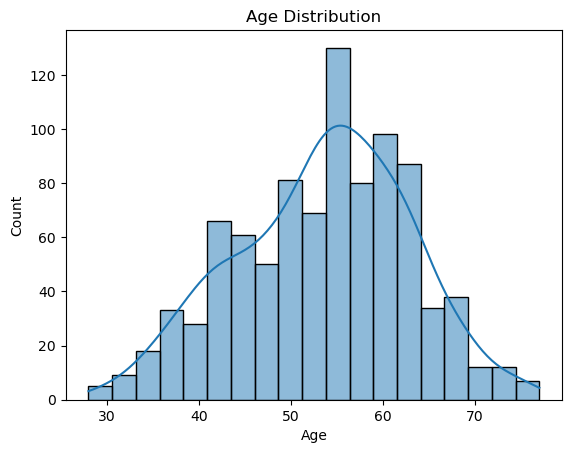

In [9]:

sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

In [10]:
df['Oldpeak'].describe()

count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

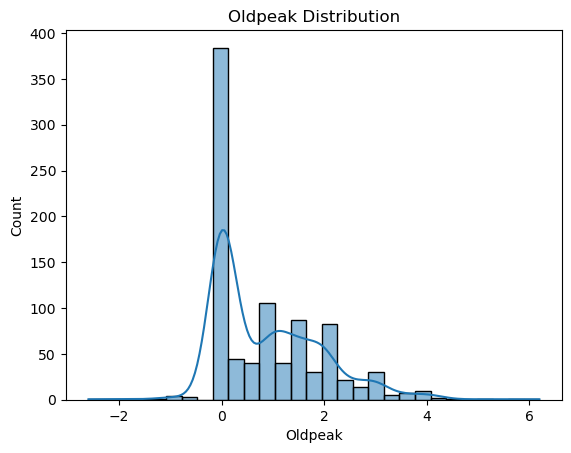

In [11]:
sns.histplot(df['Oldpeak'], kde=True)
plt.title('Oldpeak Distribution')
plt.show()

In [12]:
df['RestingBP'].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

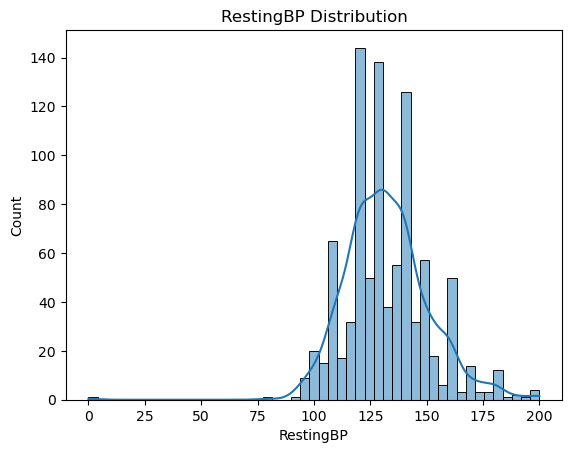

In [13]:
sns.histplot(df['RestingBP'], kde=True)
plt.title('RestingBP Distribution')
plt.show()

In [14]:
df['Cholesterol'].describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

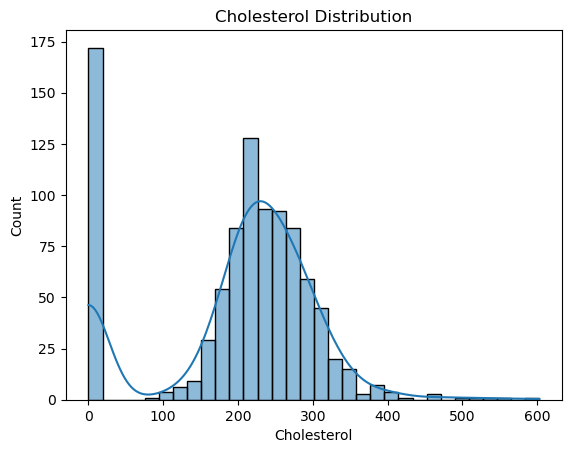

In [15]:
sns.histplot(df['Cholesterol'], kde=True)
plt.title('Cholesterol Distribution')
plt.show()

In [16]:
df['MaxHR'].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

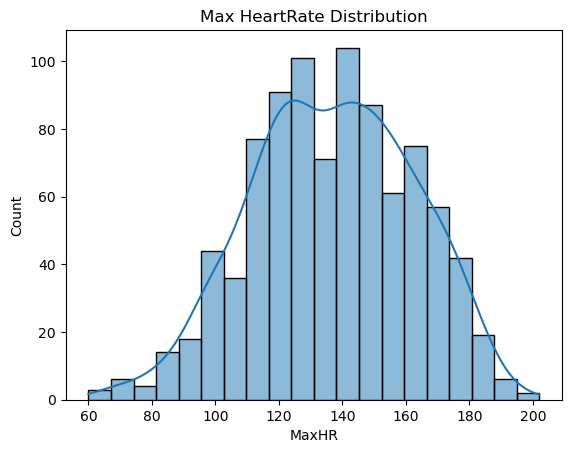

In [17]:
sns.histplot(df['MaxHR'], kde=True)
plt.title('Max HeartRate Distribution')
plt.show()

In [18]:
df['Sex'].describe()

count     918
unique      2
top         M
freq      725
Name: Sex, dtype: object

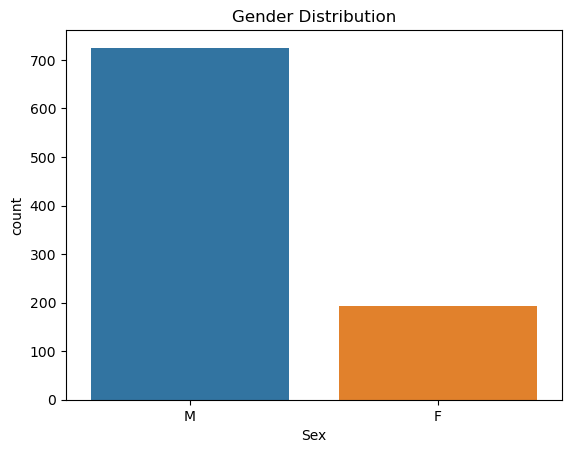

In [19]:
sns.countplot(data=df,x='Sex')
plt.title('Gender Distribution')
plt.show()

In [20]:
df['ChestPainType'].describe()

count     918
unique      4
top       ASY
freq      496
Name: ChestPainType, dtype: object

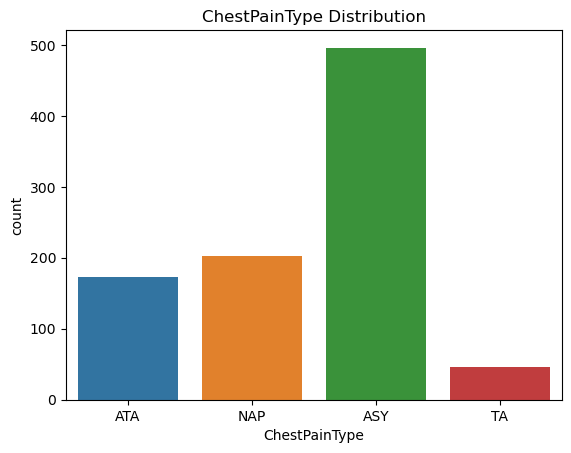

In [21]:
sns.countplot(data=df,x='ChestPainType')
plt.title('ChestPainType Distribution')
plt.show()

In [22]:
df['FastingBS'].astype('category').describe()

count     918
unique      2
top         0
freq      704
Name: FastingBS, dtype: int64

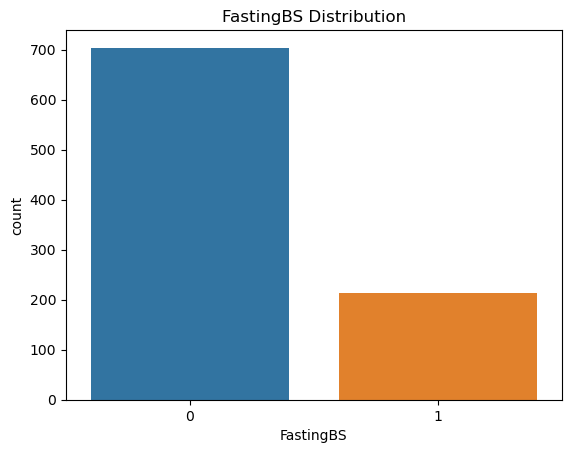

In [23]:
sns.countplot(data=df,x='FastingBS')
plt.title('FastingBS Distribution')
plt.show()

In [24]:
df['ExerciseAngina'].describe()

count     918
unique      2
top         N
freq      547
Name: ExerciseAngina, dtype: object

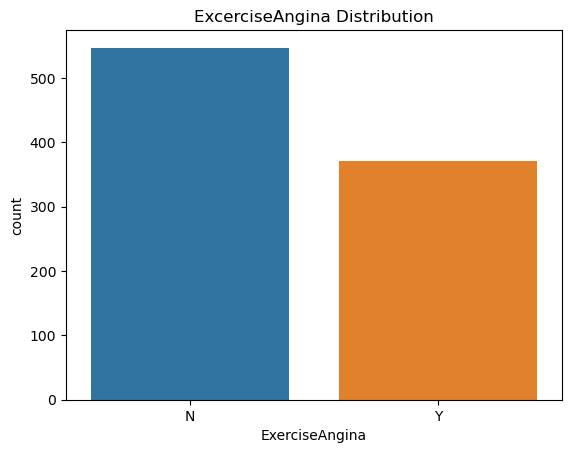

In [25]:
sns.countplot(data=df,x='ExerciseAngina')
plt.title('ExcerciseAngina Distribution')
plt.show()

In [26]:
df['HeartDisease'].astype('category').describe()

count     918
unique      2
top         1
freq      508
Name: HeartDisease, dtype: int64

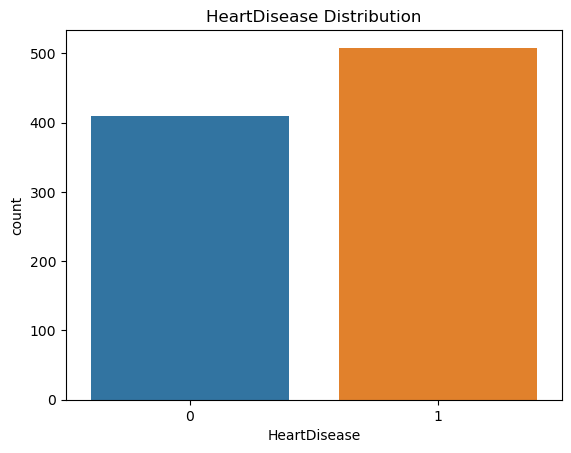

In [27]:
sns.countplot(data=df,x='HeartDisease')
plt.title('HeartDisease Distribution')
plt.show()

In [28]:
df['FastingBS']= df['FastingBS'].astype('category')
df['HeartDisease'] = df['HeartDisease'].astype('category')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


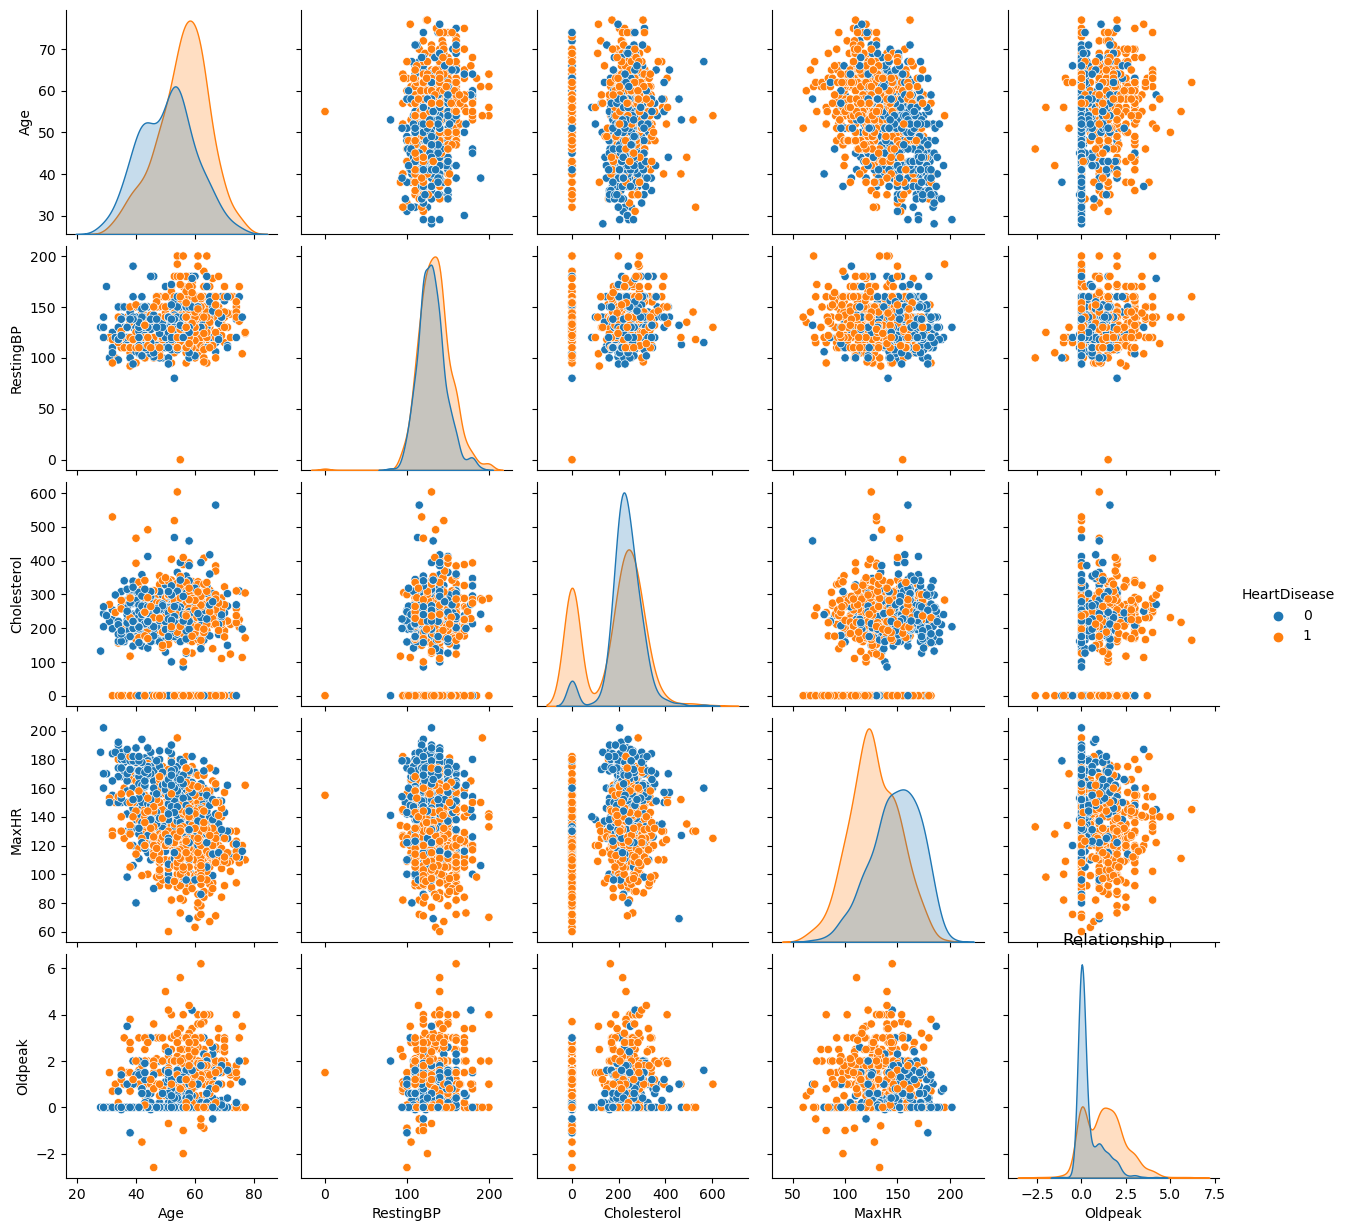

In [29]:
sns.pairplot(df,hue='HeartDisease')
plt.title('Relationship')
plt.show()

/var/folders/db/y2f9wrld6q5214f91hwssy880000gn/T/ipykernel_82968/1649565670.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


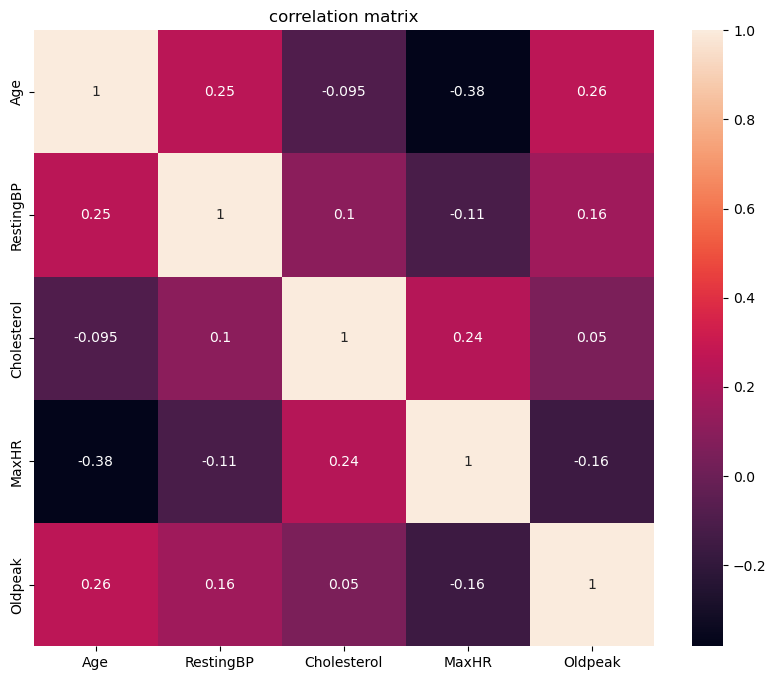

In [30]:
# Example correlation matrix for numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation matrix')
plt.show()

In [31]:
# Iterate through columns
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].astype('float64')

In [32]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49.0,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0


In [33]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df)

plt.figure(figsize=(8,6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df['HeartDisease'])
plt.title('t-SNE Visualization')
plt.show()


ValueError: could not convert string to float: 'M'

In [34]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [35]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [36]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

# Exploratory Data Analysis

In [37]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49.0,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110.0,264.0,0,Normal,132.0,N,1.2,Flat,1
914,68.0,M,ASY,144.0,193.0,1,Normal,141.0,N,3.4,Flat,1
915,57.0,M,ASY,130.0,131.0,0,Normal,115.0,Y,1.2,Flat,1
916,57.0,F,ATA,130.0,236.0,0,LVH,174.0,N,0.0,Flat,1


In [38]:

le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex) 
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,1,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49.0,0,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37.0,1,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48.0,0,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54.0,1,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,1,TA,110.0,264.0,0,Normal,132.0,N,1.2,Flat,1
914,68.0,1,ASY,144.0,193.0,1,Normal,141.0,N,3.4,Flat,1
915,57.0,1,ASY,130.0,131.0,0,Normal,115.0,Y,1.2,Flat,1
916,57.0,0,ATA,130.0,236.0,0,LVH,174.0,N,0.0,Flat,1


In [39]:
dummie_chestpaintype = pd.get_dummies(df.ChestPainType)
dummie_chestpaintype

,ASY,ATA,NAP,TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
913,0,0,0,1
914,1,0,0,0
915,1,0,0,0
916,0,1,0,0


In [40]:
df = pd.concat([df,dummie_chestpaintype], axis='columns')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA
0,40.0,1,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0,0,1,0,0
1,49.0,0,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1,0,0,1,0
2,37.0,1,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0,0,1,0,0
3,48.0,0,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1,1,0,0,0
4,54.0,1,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,1,TA,110.0,264.0,0,Normal,132.0,N,1.2,Flat,1,0,0,0,1
914,68.0,1,ASY,144.0,193.0,1,Normal,141.0,N,3.4,Flat,1,1,0,0,0
915,57.0,1,ASY,130.0,131.0,0,Normal,115.0,Y,1.2,Flat,1,1,0,0,0
916,57.0,0,ATA,130.0,236.0,0,LVH,174.0,N,0.0,Flat,1,0,1,0,0


In [41]:
df = df.drop(['ChestPainType','TA'], axis='columns') # to avoid dummy variable trap, remove one of the dummy variable created
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP
0,40.0,1,140.0,289.0,0,Normal,172.0,N,0.0,Up,0,0,1,0
1,49.0,0,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1,0,0,1
2,37.0,1,130.0,283.0,0,ST,98.0,N,0.0,Up,0,0,1,0
3,48.0,0,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1,1,0,0
4,54.0,1,150.0,195.0,0,Normal,122.0,N,0.0,Up,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,1,110.0,264.0,0,Normal,132.0,N,1.2,Flat,1,0,0,0
914,68.0,1,144.0,193.0,1,Normal,141.0,N,3.4,Flat,1,1,0,0
915,57.0,1,130.0,131.0,0,Normal,115.0,Y,1.2,Flat,1,1,0,0
916,57.0,0,130.0,236.0,0,LVH,174.0,N,0.0,Flat,1,0,1,0


In [42]:
df['RestingECG'].unique()
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [43]:
dummie_RestingECG = pd.get_dummies(df.RestingECG)
dummie_RestingECG

,LVH,Normal,ST
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
913,0,1,0
914,0,1,0
915,0,1,0
916,1,0,0


In [44]:
df = pd.concat([df,dummie_RestingECG], axis='columns')
df = df.drop(['RestingECG','ST'], axis='columns')
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,LVH,Normal
0,40.0,1,140.0,289.0,0,172.0,N,0.0,Up,0,0,1,0,0,1
1,49.0,0,160.0,180.0,0,156.0,N,1.0,Flat,1,0,0,1,0,1
2,37.0,1,130.0,283.0,0,98.0,N,0.0,Up,0,0,1,0,0,0
3,48.0,0,138.0,214.0,0,108.0,Y,1.5,Flat,1,1,0,0,0,1
4,54.0,1,150.0,195.0,0,122.0,N,0.0,Up,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,1,110.0,264.0,0,132.0,N,1.2,Flat,1,0,0,0,0,1
914,68.0,1,144.0,193.0,1,141.0,N,3.4,Flat,1,1,0,0,0,1
915,57.0,1,130.0,131.0,0,115.0,Y,1.2,Flat,1,1,0,0,0,1
916,57.0,0,130.0,236.0,0,174.0,N,0.0,Flat,1,0,1,0,1,0


In [45]:
df['ExerciseAngina'].unique()


array(['N', 'Y'], dtype=object)

In [46]:
df.ExerciseAngina = le.fit_transform(df.ExerciseAngina)
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,LVH,Normal
0,40.0,1,140.0,289.0,0,172.0,0,0.0,Up,0,0,1,0,0,1
1,49.0,0,160.0,180.0,0,156.0,0,1.0,Flat,1,0,0,1,0,1
2,37.0,1,130.0,283.0,0,98.0,0,0.0,Up,0,0,1,0,0,0
3,48.0,0,138.0,214.0,0,108.0,1,1.5,Flat,1,1,0,0,0,1
4,54.0,1,150.0,195.0,0,122.0,0,0.0,Up,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,1,110.0,264.0,0,132.0,0,1.2,Flat,1,0,0,0,0,1
914,68.0,1,144.0,193.0,1,141.0,0,3.4,Flat,1,1,0,0,0,1
915,57.0,1,130.0,131.0,0,115.0,1,1.2,Flat,1,1,0,0,0,1
916,57.0,0,130.0,236.0,0,174.0,0,0.0,Flat,1,0,1,0,1,0


In [47]:
df['ST_Slope'].unique()
df['ST_Slope'].value_counts()


Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [48]:
dummie_ST_Slope = pd.get_dummies(df.ST_Slope)
dummie_ST_Slope

,Down,Flat,Up
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
913,0,1,0
914,0,1,0
915,0,1,0
916,0,1,0


In [49]:
df = pd.concat([df,dummie_ST_Slope], axis='columns')
df = df.drop(['ST_Slope','Down' ], axis='columns')
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ASY,ATA,NAP,LVH,Normal,Flat,Up
0,40.0,1,140.0,289.0,0,172.0,0,0.0,0,0,1,0,0,1,0,1
1,49.0,0,160.0,180.0,0,156.0,0,1.0,1,0,0,1,0,1,1,0
2,37.0,1,130.0,283.0,0,98.0,0,0.0,0,0,1,0,0,0,0,1
3,48.0,0,138.0,214.0,0,108.0,1,1.5,1,1,0,0,0,1,1,0
4,54.0,1,150.0,195.0,0,122.0,0,0.0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,1,110.0,264.0,0,132.0,0,1.2,1,0,0,0,0,1,1,0
914,68.0,1,144.0,193.0,1,141.0,0,3.4,1,1,0,0,0,1,1,0
915,57.0,1,130.0,131.0,0,115.0,1,1.2,1,1,0,0,0,1,1,0
916,57.0,0,130.0,236.0,0,174.0,0,0.0,1,0,1,0,1,0,1,0


In [50]:
df.FastingBS = le.fit_transform(df.FastingBS)
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ASY,ATA,NAP,LVH,Normal,Flat,Up
0,40.0,1,140.0,289.0,0,172.0,0,0.0,0,0,1,0,0,1,0,1
1,49.0,0,160.0,180.0,0,156.0,0,1.0,1,0,0,1,0,1,1,0
2,37.0,1,130.0,283.0,0,98.0,0,0.0,0,0,1,0,0,0,0,1
3,48.0,0,138.0,214.0,0,108.0,1,1.5,1,1,0,0,0,1,1,0
4,54.0,1,150.0,195.0,0,122.0,0,0.0,0,0,0,1,0,1,0,1


In [51]:
mms = MinMaxScaler()
ss = StandardScaler()

df['Oldpeak'] = mms.fit_transform(df[['Oldpeak']])
df['Age'] = ss.fit_transform(df[['Age']])
df['RestingBP'] = ss.fit_transform(df[['RestingBP']])
df['Cholesterol'] = ss.fit_transform(df[['Cholesterol']])
df['MaxHR'] = ss.fit_transform(df[['MaxHR']])

df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ASY,ATA,NAP,LVH,Normal,Flat,Up
0,-1.433140,1,0.410909,0.825070,0,1.382928,0,0.295455,0,0,1,0,0,1,0,1
1,-0.478484,0,1.491752,-0.171961,0,0.754157,0,0.409091,1,0,0,1,0,1,1,0
2,-1.751359,1,-0.129513,0.770188,0,-1.525138,0,0.295455,0,0,1,0,0,0,0,1
3,-0.584556,0,0.302825,0.139040,0,-1.132156,1,0.465909,1,1,0,0,0,1,1,0
4,0.051881,1,0.951331,-0.034755,0,-0.581981,0,0.295455,0,0,0,1,0,1,0,1


In [ ]:
from sklearn.feature_selection import SelectKBest ,f_classif
from sklearn.feature_selection import chi2

# Assuming 'HeartDisease' is the target variable
categorical_features = df[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]
target = df['HeartDisease']  # Assuming 'HeartDisease' is the target variable

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(categorical_features, target)

featureScores = pd.DataFrame(data={'Chi squared Score': fit.scores_}, index=categorical_features.columns)
featureScores = featureScores.sort_values(by='Chi squared Score', ascending=False)

# Plotting
plt.subplots(figsize=(8, 6))
sns.barplot(x=featureScores['Chi squared Score'], y=featureScores.index, palette='viridis')
plt.title('Selection of Categorical Features using Chi Squared Score')
plt.xlabel('Chi squared Score')
plt.ylabel('Features')
plt.show()

In [ ]:
numerical_features = df[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']]
target = df[['HeartDisease']]

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(numerical_features, target)

featureScores = pd.DataFrame(data={'ANOVA Score': fit.scores_}, index=numerical_features.columns)
featureScores = featureScores.sort_values(by='ANOVA Score', ascending=False)

# Plotting
plt.subplots(figsize=(8, 6))
sns.barplot(x=featureScores['ANOVA Score'], y=featureScores.index, palette='viridis')
plt.title('Selection of Nuemerical Features using ANOVA Score')
plt.xlabel('ANOVA Score')
plt.ylabel('Features')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import ttest_ind
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
numerical_features = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
target = df['HeartDisease']  # Assuming HeartDisease is a binary target variable

# Perform t-test for each feature
ttest_scores = [ttest_ind(numerical_features[feature], target)[0] for feature in numerical_features.columns]

# Create a DataFrame to store t-test scores
feature_scores = pd.DataFrame(data={'t-test Score': ttest_scores}, index=numerical_features.columns)
feature_scores = feature_scores.sort_values(by='t-test Score', ascending=False)

# Plotting
plt.subplots(figsize=(8, 6))
sns.barplot(x=feature_scores['t-test Score'], y=feature_scores.index, palette='viridis')
plt.title('Selection of Numerical Features using t-test Score')
plt.xlabel('t-test Score')
plt.ylabel('Features')
plt.show()


# Model selection

In [55]:
X = df.drop(['HeartDisease'], axis='columns')
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ASY,ATA,NAP,LVH,Normal,Flat,Up
0,-1.433140,1,0.410909,0.825070,0,1.382928,0,0.295455,0,1,0,0,1,0,1
1,-0.478484,0,1.491752,-0.171961,0,0.754157,0,0.409091,0,0,1,0,1,1,0
2,-1.751359,1,-0.129513,0.770188,0,-1.525138,0,0.295455,0,1,0,0,0,0,1
3,-0.584556,0,0.302825,0.139040,0,-1.132156,1,0.465909,1,0,0,0,1,1,0
4,0.051881,1,0.951331,-0.034755,0,-0.581981,0,0.295455,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,-1.210356,0.596393,0,-0.188999,0,0.431818,0,0,0,0,1,1,0
914,1.536902,1,0.627078,-0.053049,1,0.164684,0,0.681818,1,0,0,0,1,1,0
915,0.370100,1,-0.129513,-0.620168,0,-0.857069,1,0.431818,1,0,0,0,1,1,0
916,0.370100,0,-0.129513,0.340275,0,1.461525,0,0.295455,0,1,0,1,0,1,0


In [56]:
X = df.drop(['HeartDisease'], axis='columns')
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ASY,ATA,NAP,LVH,Normal,Flat,Up
0,-1.433140,1,0.410909,0.825070,0,1.382928,0,0.295455,0,1,0,0,1,0,1
1,-0.478484,0,1.491752,-0.171961,0,0.754157,0,0.409091,0,0,1,0,1,1,0
2,-1.751359,1,-0.129513,0.770188,0,-1.525138,0,0.295455,0,1,0,0,0,0,1
3,-0.584556,0,0.302825,0.139040,0,-1.132156,1,0.465909,1,0,0,0,1,1,0
4,0.051881,1,0.951331,-0.034755,0,-0.581981,0,0.295455,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,-1.210356,0.596393,0,-0.188999,0,0.431818,0,0,0,0,1,1,0
914,1.536902,1,0.627078,-0.053049,1,0.164684,0,0.681818,1,0,0,0,1,1,0
915,0.370100,1,-0.129513,-0.620168,0,-0.857069,1,0.431818,1,0,0,0,1,1,0
916,0.370100,0,-0.129513,0.340275,0,1.461525,0,0.295455,0,1,0,1,0,1,0


In [57]:
y = df['HeartDisease']
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: category
Categories (2, int64): [0, 1]

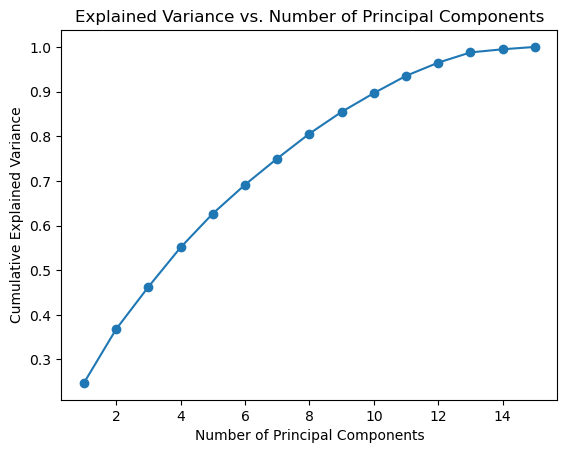

In [62]:


# Assuming your data is stored in a variable named 'data'
# data should be a 2D array where rows are samples and columns are features

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# Initialize PCA
pca = PCA()

# Fit the model
pca.fit(data_scaled)

# Calculate the cumulative explained variance
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance versus the number of principal components
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.show()


In [ ]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)



In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [64]:
X_test.shape

(184, 15)

In [65]:
X_train.shape

(734, 15)

# Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Extract precision and recall from the classification report
precision = classification_rep.split('\n')[2].split()[1]
recall = classification_rep.split('\n')[3].split()[1]

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


In [ ]:
lr = LogisticRegression(penalty='l2')
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Extract precision and recall from the classification report
precision = classification_rep.split('\n')[2].split()[1]
recall = classification_rep.split('\n')[3].split()[1]

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


# Support Vector Classifier

In [ ]:
svc_classifier = SVC(kernel='poly', C=1.0)
svc_classifier.fit(X_train,y_train)
y_pred = svc_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Extract precision and recall from the classification report
precision = classification_rep.split('\n')[2].split()[1]
recall = classification_rep.split('\n')[3].split()[1]

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


# Decision Tree Classifier

In [ ]:

# Assuming you have loaded your dataset into X and y

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Extract precision and recall from the classification report
precision = classification_rep.split('\n')[2].split()[1]
recall = classification_rep.split('\n')[3].split()[1]

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


In [ ]:
# Assuming you have loaded your dataset into X and y

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
model = DecisionTreeClassifier(criterion = 'entropy',random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Extract precision and recall from the classification report
precision = classification_rep.split('\n')[2].split()[1]
recall = classification_rep.split('\n')[3].split()[1]

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


# Multilayer Perceptron

In [71]:
# Create and train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(10,),alpha=0.001, max_iter=200, activation='relu',learning_rate='constant',learning_rate_init=0.01)
mlp_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = mlp_model.predict(X_test)
1
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Extract precision and recall from the classification report
precision = classification_rep.split('\n')[2].split()[1]
recall = classification_rep.split('\n')[3].split()[1]

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


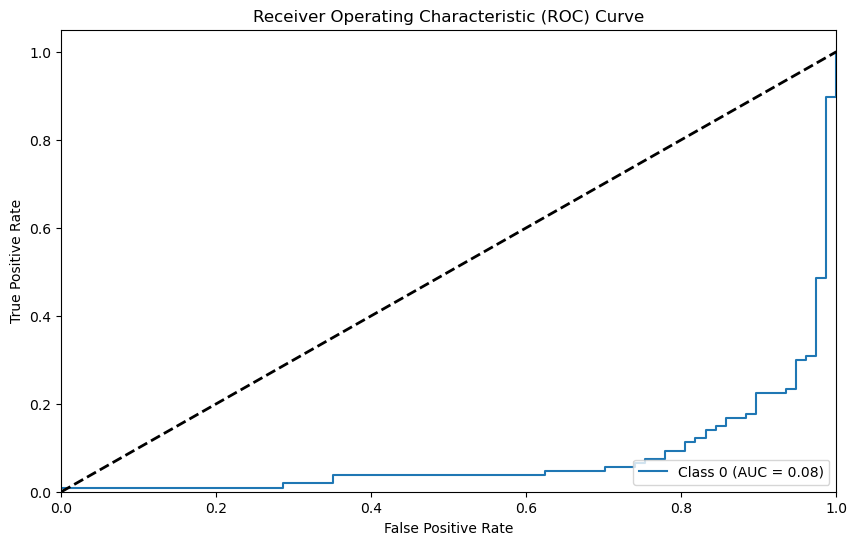

In [74]:
# Example data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert y_train and y_test to binary indicator matrix
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Create and train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(10,), alpha=0.001, max_iter=200, activation='relu', learning_rate='constant', learning_rate_init=0.01)
mlp_model = OneVsRestClassifier(mlp_model)
mlp_model.fit(X_train, y_train_bin)

# Predict probabilities for each class on the test set
y_score = mlp_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = y_train_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Naive Bayes Classifier: Gaussian

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

# Extract precision and recall from the classification report
precision_nb = classification_rep_nb.split('\n')[2].split()[1]
recall_nb = classification_rep_nb.split('\n')[3].split()[1]

print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(f"Confusion Matrix:\n{conf_matrix_nb}")
print(f"Classification Report:\n{classification_rep_nb}")
print(f"Naive Bayes Precision: {precision_nb}")
print(f"Naive Bayes Recall: {recall_nb}")

# Random Forest Classifier

In [ ]:

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Extract precision and recall from the classification report
precision_rf = float(classification_rep_rf.split('\n')[2].split()[1])
recall_rf = float(classification_rep_rf.split('\n')[3].split()[1])

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")
print(f"Classification Report:\n{classification_rep_rf}")
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")


In [ ]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier(criterion = 'entropy',random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Extract precision and recall from the classification report
precision_rf = float(classification_rep_rf.split('\n')[2].split()[1])
recall_rf = float(classification_rep_rf.split('\n')[3].split()[1])

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")
print(f"Classification Report:\n{classification_rep_rf}")
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")


# Grid search CV

In [52]:
model_params = {
    'decision_tree': {
        'model': DecisionTreeClassifier(criterion = 'entropy',random_state=42),
        'params':{
            'max_depth': [3,5,7],
            'min_samples_split': [2,5,10]
        }
    },
    'naive_bayes': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
        }
    },
    
    'svm': {
        'model': SVC(gamma = 'auto'),
        'params': {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10]
        }
        
    },
    'logistic_reg': {
        'model': LogisticRegression(solver = 'liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
        
    },
    'mlp': {
        'model': MLPClassifier(),
        'params': {
            'hidden_layer_sizes': [(10,), (50,), (100,)],
            'activation': ['relu', 'tanh', 'logistic'],
            'alpha': [0.0001, 0.001, 0.01],
            'learning_rate': ['constant', 'invscaling', 'adaptive'],
            'learning_rate_init': [0.001, 0.01, 0.1],
            'max_iter': [100, 200, 300]
        }
    }
}

In [53]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)

In [58]:
scorer = make_scorer(recall_score, average='weighted')  # You can adjust the 'average' parameter if needed


scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=kf,scoring=scorer, return_train_score=False)
    clf.fit(X,y)
    best_recall = clf.best_score_
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_recall': best_recall
    })

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached 

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached 

In [59]:
df_scores = pd.DataFrame(scores, columns=['model','best_score','best_params'])


In [60]:
from IPython.display import display

display(df_scores)

,model,best_score,best_params
0,decision_tree,0.831155,"{'max_depth': 3, 'min_samples_split': 2}"
1,naive_bayes,0.863834,{'var_smoothing': 1e-09}
2,svm,0.867102,"{'C': 1, 'kernel': 'rbf'}"
3,random_forest,0.836601,{'n_estimators': 10}
4,logistic_reg,0.862745,{'C': 1}
5,mlp,0.872549,"{'activation': 'relu', 'alpha': 0.001, 'hidden..."


In [61]:
df_scores['best_params'][5]

{'activation': 'relu',
 'alpha': 0.001,
 'hidden_layer_sizes': (10,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_iter': 200}